#  Analyse exploratoire (EDA)

Dans ce notebook, nous réalisons une exploration complète du dataset USA Accidents.  
Objectifs :
- Étudier la distribution des principales variables
- Identifier les valeurs extrêmes (outliers)
- Observer les relations entre variables
- Produire des statistiques descriptives
- Comprendre la structure générale du dataset avant visualisation


# Importation des bibleothèques 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('../data/processed/US_Accidents_clean.csv')

In [3]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

##  Statistiques descriptives

Résumé statistique des colonnes numériques du dataset.
Cela permet de détecter :
- les ordres de grandeur,
- les dispersions,
- les anomalies éventuelles.

# 1. Aperçu général

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 36 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ID                 object 
 1   Source             object 
 2   Severity           int64  
 3   Start_Time         object 
 4   End_Time           object 
 5   Start_Lat          float64
 6   Start_Lng          float64
 7   Distance(mi)       float64
 8   Description        object 
 9   Street             object 
 10  City               object 
 11  County             object 
 12  State              object 
 13  Country            object 
 14  Timezone           object 
 15  Temperature(F)     float64
 16  Humidity(%)        float64
 17  Pressure(in)       float64
 18  Visibility(mi)     float64
 19  Wind_Direction     object 
 20  Wind_Speed(mph)    float64
 21  Precipitation(in)  float64
 22  Weather_Condition  object 
 23  Amenity            bool   
 24  Bump               bool   
 25  Crossing          

In [5]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,...,False,False,False,False,False,False,False,False,False,False
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,...,False,False,False,False,False,False,False,False,False,False
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,...,False,False,False,False,False,False,False,False,True,False
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,...,False,False,False,False,False,False,False,False,False,False
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,...,False,False,False,False,False,False,False,False,True,False


In [6]:
df.describe(include='all')

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
count,7728394,7728394,7.728394e+06,7728394,7728394,7.728394e+06,7.728394e+06,7.728394e+06,7728394,7728394,...,7728394,7728394,7728394,7728394,7728394,7728394,7728394,7728394,7728394,7728394
unique,7728394,3,NaN,6131796,6705355,NaN,NaN,NaN,3761579,336307,...,2,2,2,2,2,2,2,2,2,1
top,A-1,Source1,NaN,2021-01-26 16:16:13,2021-11-22 08:00:00,NaN,NaN,NaN,A crash has occurred causing no to minimum del...,I-95 N,...,False,False,False,False,False,False,False,False,False,False
freq,1,4325632,NaN,225,112,NaN,NaN,NaN,9593,78430,...,7691812,7157052,7708849,7661415,7728145,7526493,7514023,7720796,6584622,7728394
mean,NaN,NaN,2.212384e+00,NaN,NaN,3.620119e+01,-9.470255e+01,5.618423e-01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,4.875313e-01,NaN,NaN,5.076079e+00,1.739176e+01,1.776811e+00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000e+00,NaN,NaN,2.455480e+01,-1.246238e+02,0.000000e+00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2.000000e+00,NaN,NaN,3.339963e+01,-1.172194e+02,0.000000e+00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2.000000e+00,NaN,NaN,3.582397e+01,-8.776662e+01,3.000000e-02,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2.000000e+00,NaN,NaN,4.008496e+01,-8.035368e+01,4.640000e-01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##  Analyse des variables catégorielles

Étude de la distribution des catégories (État, météo, luminosité, etc.)


# 2. Distribution de la gravité

/var/folders/r8/k96sg_qj0hl_sng_4mxjv1cw0000gn/T/ipykernel_14293/2870834305.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Severity', palette='coolwarm')


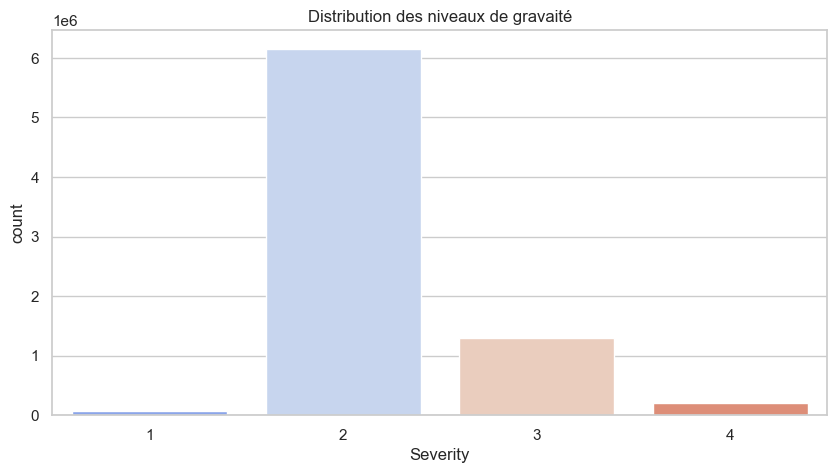

In [7]:
sns.countplot(data=df, x='Severity', palette='coolwarm')
plt.title('Distribution des niveaux de gravaité')
plt.savefig('../data/outputs/graphs/severity_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. États les plus touchés

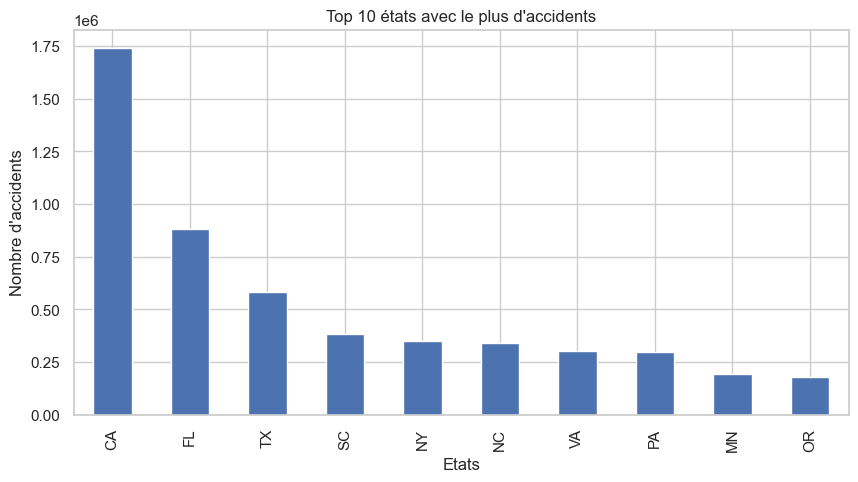

In [8]:
df['State'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 états avec le plus d\'accidents')
plt.xlabel('Etats')
plt.ylabel('Nombre d\'accidents')
plt.show()

# 4. Analyse météo

Nombre total de catégories météo : 144


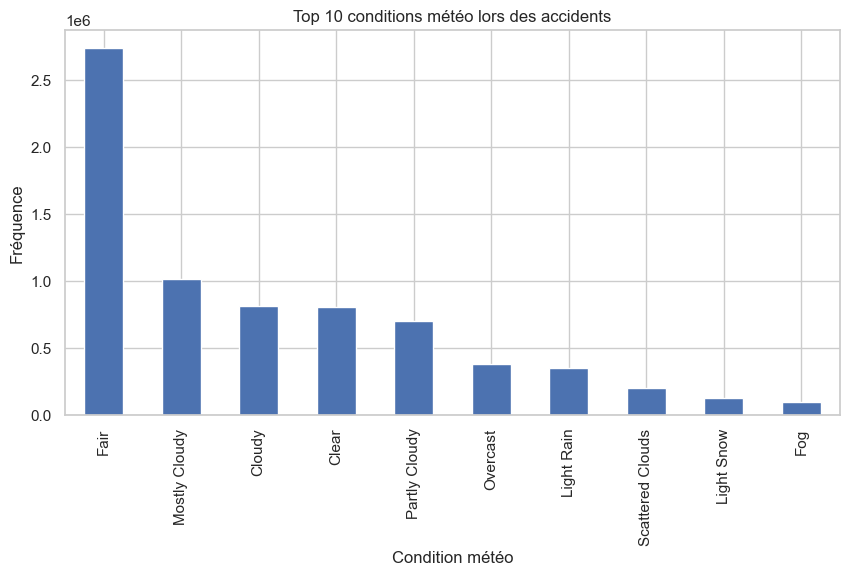

In [25]:
print("Nombre total de catégories météo :", df['Weather_Condition'].nunique())
df['Weather_Condition'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 conditions météo lors des accidents')
plt.xlabel('Condition météo')
plt.ylabel('Fréquence')
plt.savefig('../data/outputs/graphs/top10_weather_conditions.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. Accidents par heure (Top 5 États)

/var/folders/r8/k96sg_qj0hl_sng_4mxjv1cw0000gn/T/ipykernel_14293/3014995470.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Hour', palette='viridis')


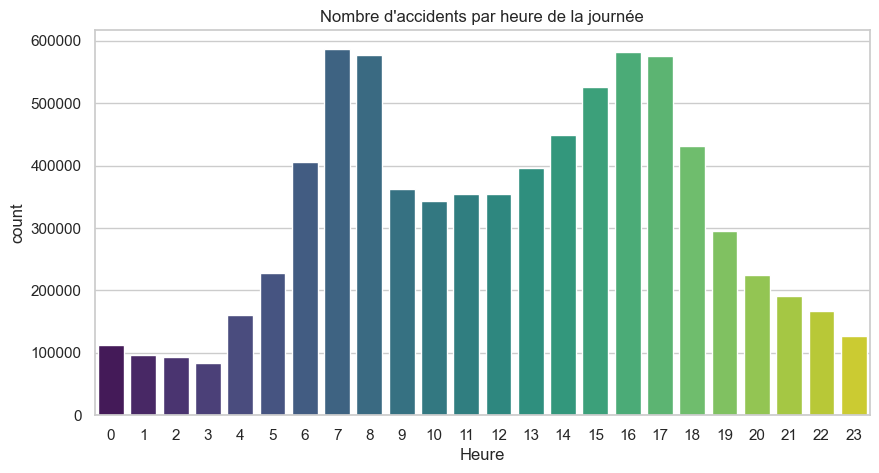

/var/folders/r8/k96sg_qj0hl_sng_4mxjv1cw0000gn/T/ipykernel_14293/3014995470.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Day_of_Week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='magma')


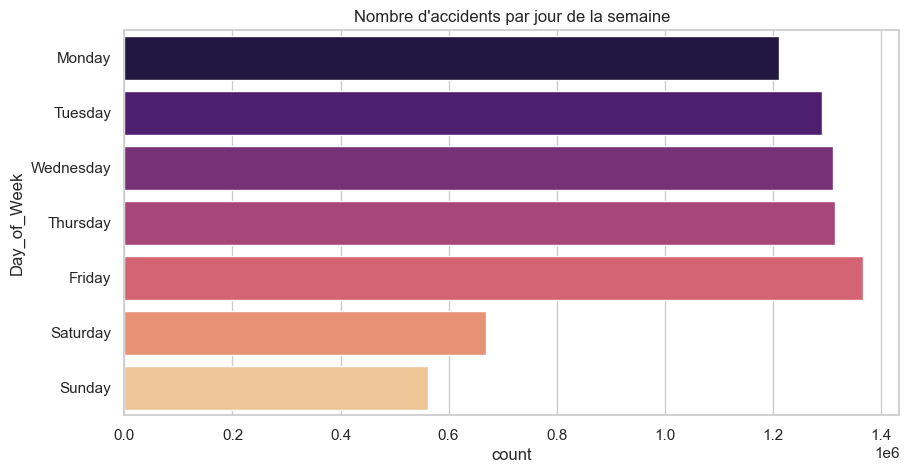

<Figure size 1000x500 with 0 Axes>

In [26]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['Hour'] = df['Start_Time'].dt.hour
df['Day_of_Week'] = df['Start_Time'].dt.day_name()

sns.countplot(data=df, x='Hour', palette='viridis')
plt.title('Nombre d\'accidents par heure de la journée')
plt.xlabel('Heure')
plt.show()


sns.countplot(data=df, y='Day_of_Week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='magma')
plt.title('Nombre d\'accidents par jour de la semaine')
plt.show()

plt.savefig('../data/outputs/graphs/accidents_by_hour.png', dpi=300, bbox_inches='tight')



# 6. Heatmap de corrélation

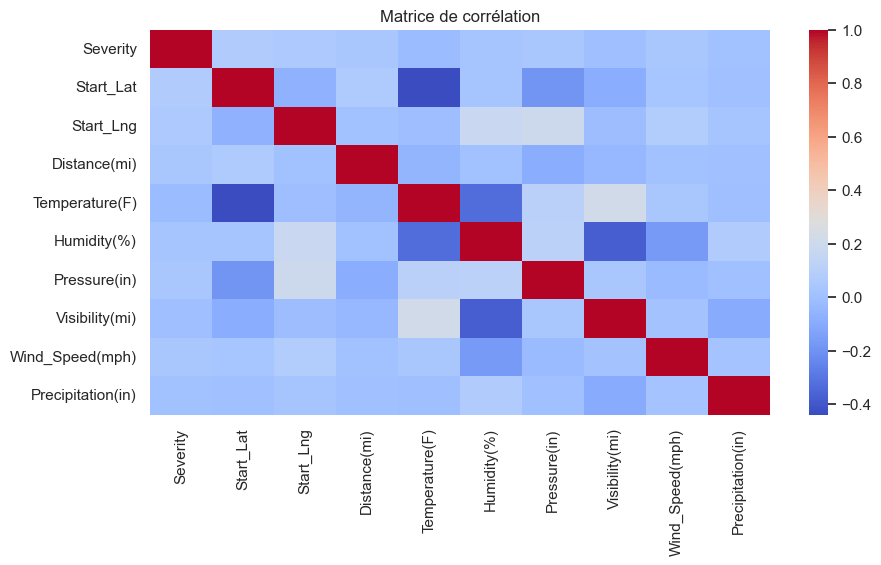

In [30]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.savefig('../data/outputs/graphs/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

/var/folders/r8/k96sg_qj0hl_sng_4mxjv1cw0000gn/T/ipykernel_14293/2524325624.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Month', order=df['Month'].value_counts().index, palette='Spectral')


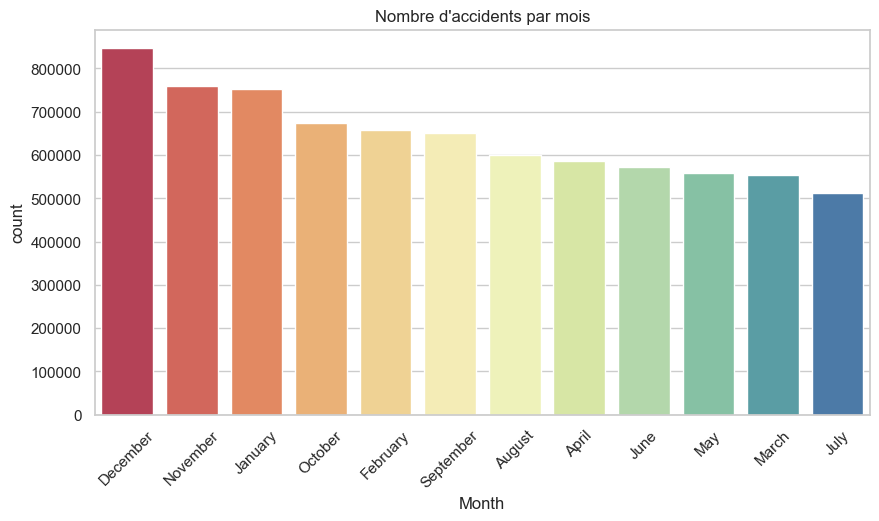

In [12]:
df['Month'] = df['Start_Time'].dt.month_name()
sns.countplot(data=df, x='Month', order=df['Month'].value_counts().index, palette='Spectral')
plt.title("Nombre d'accidents par mois")
plt.xticks(rotation=45)
plt.show()


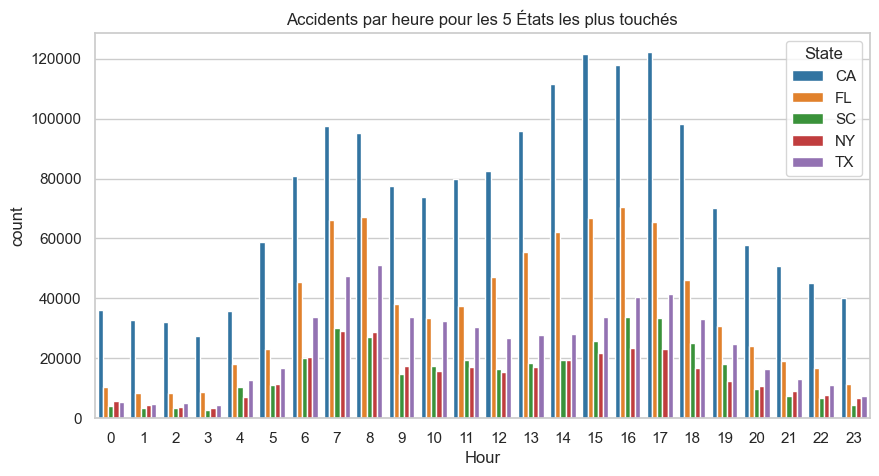

In [13]:
top_states = df['State'].value_counts().head(5).index
subset = df[df['State'].isin(top_states)]
sns.countplot(data=subset, x='Hour', hue='State', palette='tab10')
plt.title('Accidents par heure pour les 5 États les plus touchés')
plt.show()


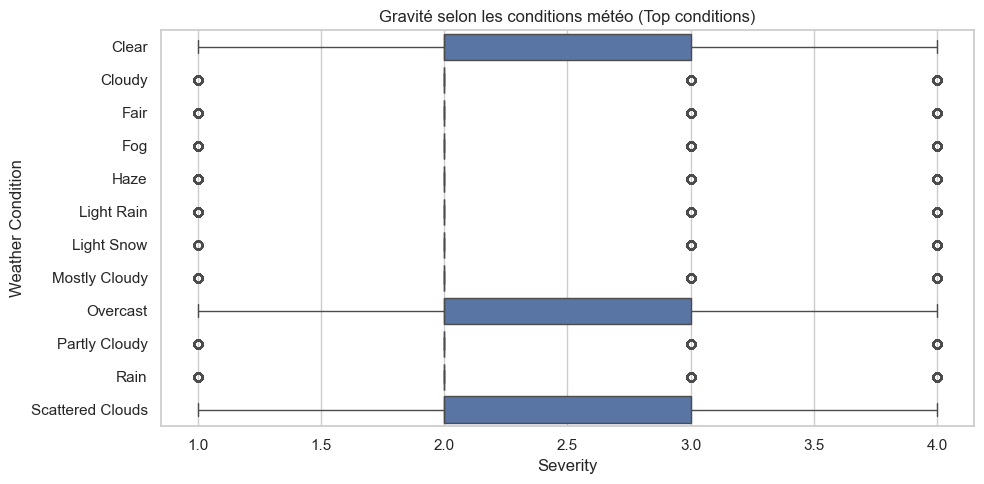

In [28]:
top_n = 12
top_conditions = df['Weather_Condition'].value_counts().head(top_n).index

df_top = df[df['Weather_Condition'].isin(top_conditions)].copy()

order = (df_top.groupby("Weather_Condition")["Severity"]
         .median()
         .sort_values(ascending=False)
         .index)

sns.boxplot(data=df_top, y="Weather_Condition", x="Severity", order=order)
plt.title("Gravité selon les conditions météo (Top conditions)")
plt.xlabel("Severity")
plt.ylabel("Weather Condition")
plt.tight_layout()
plt.savefig('../data/outputs/graphs/severity_by_weather.png', dpi=300, bbox_inches='tight')
plt.show()